In [9]:
from Bio import SeqIO, pairwise2
from Bio.Seq import Seq
from collections import Counter
from matplotlib import pyplot as plt
from Bio.SeqUtils import GC, MeltingTemp as mt, molecular_weight as mw, nt_search
from Bio.pairwise2 import format_alignment
from Levenshtein import distance

In [5]:
record = SeqIO.read('a.fasta', 'fasta')
seqA = record.seq
print("Seq A:",seqA)
print("length:", len(seqA))
print("complement:", seqA.complement())
print("transcribe:", seqA.transcribe())
print("translate:", seqA.translate())

Seq A: AAAGACTTTAAAATCAAAAAAAAATGGGAACAGGAGAGCATTGGAAGACTTTTTAAAAATGTTATTGTTCACATGAAGGGTACGCTTCTGTTTGATGGGAACGCAAAAGAAGCCTTTGAGAAAGCCAAAGAGGCAAACGAAGGGGAGCTGAAAATGAAGGGCAGCAGCGTTACCTGGCAGGTACTGGAGGGAGATGAAGAGAAAGAGATGCTGAAGAAGATCATTGAAGCCCAACAGGAATCATACAATCGATCAAAAGGCAGAGGCGGGAGAGGAAGATCTGGCGGCAGAGGAAGAGGAGGCCGAAGGGGAAGAGGTGGCAGAGATCAAGGCAGGACTCAGTTCCAGGGGAAGAAAACGAAATTTGACAGTGATAATGAGGATGACGACGAGGGTGAGGAAGCACCTGCAGCCCCAAAGAGAGAGCTTGAAGACGCAGACGGTCCTCCAGCGAAAGTTTTCAAAACTGAAAACGGCTCGTAATGTGGAGACGACGTCCAGAGTTTTTTCTTTAGCAAACAGATTTATTACAAACGGTGAAAAATGCAGAGGCAACTTAAAGCCCATTCCAGTAAAAAACATTCAGGCTTTGGAGAATCGGAGAAAGTCCACCTGGATGTCAACCTGAAGAAACATTTGGAAAACTTGGAGTCAGTTTTCAGCTTTTTAAGCCCTTTATTTTTTGCCTCTTATTTGTATGTTTTCTTTTCTCAACGAAAAATGTTTTAATTTTAGCACAATCAACGTAAACCTGACGGTCTAATTTCATCTGAGTGATAGCTAGAATTAGTGTGCCATTGGTTGTTTGTTTTCATTTTGTAGATTTACTACATTGAGTGATGCGAATGTGTCATGAATTTCGTTTAAAGTTTGCATATTCCAGTAGCAAATTAAATGTTTATAAAAAATAAAGTTTTGTTTTGGATCTGAAGTGCATGATATTGCATATTGTTAATGAACTTACAGACTTCTTCTTGTGGAAGCGGTAGGAAG

In [6]:
seqPart = seqA[4:40]
print("from 5 to 40:", seqPart)

from 5 to 40: ACTTTAAAATCAAAAAAAAATGGGAACAGGAGAGCA


In [7]:
nt_search(str(seqA), 'AATC')

['AATC', 11, 238, 246, 595, 738, 999, 1139, 1190]

In [13]:
print("GC:", GC(seqA))
print("AT:", 100-GC(seqA))

# not only ATGC
temp = [x for x in seqA if x in 'ATGC']
temp = ''.join(temp)
print("GC:", GC(temp))
print("AT:", 100-GC(temp))

GC: 39.30348258706468
AT: 60.69651741293532
GC: 39.30348258706468
AT: 60.69651741293532


<BarContainer object of 4 artists>

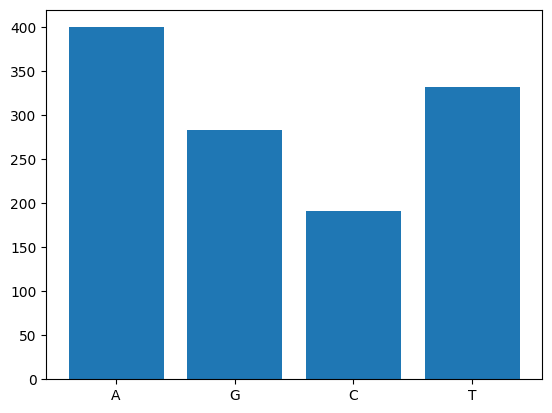

In [14]:
resCounter = Counter(seqA)
plt.bar(resCounter.keys(), resCounter.values())

In [15]:
print("wallace:", mt.Tm_Wallace(seqA))
print("NN:", mt.Tm_NN(seqA))
print("GC:", mt.Tm_GC(seqA))

wallace: 3360.0
NN: 78.14267580214818
GC: 75.27180768830074


In [16]:
print("molecular weight:", mw(seqA))

molecular weight: 374691.7512000026


In [34]:
seqB = "CGTAGCTAGCGACTAGTCGACAGCGATCGATGATATGCATGATGATGTATATAATGTGCAGTCGATGCTGATGCATTCTGGCGTCTGACGCTAGCTAGGCTAGCTAGCAGCTAGCTGATCGATGCGATGCTAGTACTGAGTCGACGATGCTAGCTA"
globalAlignxx = pairwise2.align.globalxx(seqA, seqB)
globalAlignmx = pairwise2.align.globalmx(seqA, seqB, 2, -1)
globalAlignms = pairwise2.align.globalms(seqA, seqB, 5, -1, -2, -1)
print("score globalxx:", globalAlignxx[0][2]) #get score without score_only=True
print(format_alignment(*globalAlignmx[0])) #get alignment
print("score globalms:", globalAlignms[0][2])

score globalxx: 156.0
AAAGACTTTAAAATCAAAAAAAAATGGGAACAGGAGAGCATTGGAAGACTTTTTAAAAATGTTATTGTTCACATGAAGGGTACGCTTCTGTTTGATGGGAACGCAAAAGAAGCCTTTGAGAAAGCCAAAGAGGCAAACGAAGGGGAGCTGAAAATGAAGGGCAGCAGCGTTACCTGGCAGGTACTGGAGGGAGATGAAGAGAAAGAGATGCTGAAGAAGATCATTGAAGCCCAACAGGAATCATACAATCGATCAAAAGGCAGAGGCGGGAGAGGAAGATCTGGCGGCAGAGGAAGAGGAGGCCGAAGGGGAAGAGGTGGCAGAGATCAAGGCAGGACTCAGTTCCAGGGGAAGAAAACGAAATTTGACAGTGATAATGAGGATGACGACGAGGGTGAGGAAGCACCTGCAGCCCCAAAGAGAGAGCTTGAAGACGCAGACGGTCCTCCAGCGAAAGTTTTCAAAACTGAAAACGGCTCGTAATGTGGAGACGACGTCCAGAGTTTTTTCTTTAGCAAACAGATTTATTACAAACGGTGAAAAATGCAGAGGCAACTTAAAGCCCATTCCAGTAAAAAACATTCAGGCTTTGGAGAATCGGAGAAAGTCCACCTGGATGTCAACCTGAAGAAACATTTGGAAAACTTGGAGTCAGTTTTCAGCTTTTTAAGCCCTTTATTTTTTGCCTCTTATTTGTATGTTTTCTTTTCTCAACGAAAAATGTTTTAATTTTAGCACAATCAACGTAAACCTGACGGTCTAATTTCATCTGAGTGATAGCTAGAATTAGTGTGCCATTGGTTGTTTGTTTTCATTTTGTAGATTTACTACATTGAGTGATGCGAATGTGTCATGAATTTCGTTTAAAGTTTGCATATTCCAGTAGCAAATTAAATGTTTATAAAAAATAAAGTTTTGTTTTGGATCTGAAGTGCATGATATTGCATATTGTTAATGAACTTACAGACTTCTTCTTGT

In [35]:
def hamming(seq1, seq2):
    return len([(x,y) for x,y in zip(seq1, seq2) if x != y])

seqC = "AGCTGATCGTACGTAGGACGTAGTCGATATCTACATGAGCGCGGCGCATATATATATGCGATCGTAGCTGACGATCATCATCGTAGCTAGTCGATGCTAGCTGATCGCCCCCGGGGGGGGATATATTATATAGGTATAAAAAATGTGTGTTGGTTTTTTTTTTTTTTTTCAGTCGTAGCTGATCGATGCGATGCTAGTCGTAGCTGATCGATCGTAGCTGATCGTAACGACGTCCAGAGTTTTTTCTTTAGCAAACAGATTTATTACAAACGGTGAAAAATGCAGAGGCAACTTAAAGCCCATTCCAGTAAAAAACATTCAGGCTTTGGAGAATCGGAGAAAGTCCACCTGGATGTCAACCTGAAGAAACATTTGGAAAACTTGGAGTCAGTTTTCAGCTTTTTAAGCCCTTTATTTTTTGCCTCTTATTTGTATGTTTCTTTTCTCAACGAAAAATGTTTTAATTTTAGCACAATCAACGTAAACCTGACGGTCTAATTTCATCTGAGTGATAGCTAGAATTAGTGTGCCATTGGTTGTTTGTTTTCATTTTGTAGATTTACTACATTGAGTGTGCGAATGTGTCATGAATTTCGTTTAAAGTTTGCATATTCCAGTAGCAAATTAAATGTTTATAAAAAATAAGTTTTGTTTTGGATCTGAAGTGCATGATATTGCATATTGTTAATGAACTTACAGACTTCTTCTTGTGGCGTAGCGATCGTAGCTGATGCTGATCGATGCTAGTCGATGCGATCGTAGCTGATGCTAGCTGATCGTAGCTAGCTAGCTAGTCGTGTGCTGTCGTGTGTGATCATCGATGCTAGCGATCGAGCTAGCTGATCGAGCTAGTCGATCGTAGCTAGTCGATGCTAGCTGATCGTAGCTGATCGTATATTTATATATATGCGCTACTAGCTTGACGATCATGCTAGTGTGTGTCGTAGCTGATGCGCGCGCGTATATATATAATTTTTTTTAAAGTCGATGCCCCCCCCGGGGGAGATGTCAGCTGATCGATGCTAGGATATGCTGATCGTAGCTGACGATGCTGATGCTAGGGCGCCCGGGATTATATATTTTTAAAGGCTACGTACGGGCGCGCGGGGCGAGCTGAGGGGCGCGCGGTATATATTATAGCTGTAGCTAGCTGAGCTAGCTGGGGATAAAAAATTTTTTATGCTAGCTGATCGATGCATCGCGAGA"
print("hamming distance:", hamming(seqA, seqC))

hamming distance: 875


In [36]:
seqD = "TAGAGGCAATGTTATATGAGAATCCTCCAAATGTCCTCCGACATAAATAGCCGGCTCCACCTGTTTGCCTGCACCTGACGTAGCGCCAACTGTCCTCTACCATGGGGGGGCTGCATATCGCACAGCTGTGCGGGTAGAAACTCACATTCCATGGCGATTAGTCGCCGGTGCAGCACATGGGAGCTAATTCGGCATGTGCCCCCAAGCGGGCAGGATAAGGACGCAAGCAATAATGATTGAATGCATAGGACGATGCACACTCGGATGAAGTCTGTCACCTTGGTGCGTTGTATACTCACTCTTTGCCGTGCCGGCAAAATCGGTAAAGGAAGAAGGGTGGTAGCGTCGTTGGGAGGCTCGAAAGCATAAAGTATAGATGCCCTGTAGCACCGTATGCTAGACAGGTTCTAGAGCCCTACCTGTATGAAACCCTTGAACCGCTATCGAGCACGTGTCAAACCCCACCAGATCGTGGAATCCCGCGAGGCGTCATCTATGTACTGTGCTATATCCCCCTTGGCGACCCAGTGATGCCAGGGGCTTGCGTCAAACCAAGTTGGTAGTATCTATCGACATGATAGAATCCATCGTCTAGGATTACGTAAGCCGCAAGCACTCGATCAGGCGCTAGAGCCATTCACATATATATAAGCTCTCGATCTAAGAAGCGTCATCGATCCCTCTAGGATGCCAAGCTTGTGGTTGATCGACATATACAGCTATAAGTCAACGGGCCTTCCACCCGCGTTTTTCTCGCTAGTGATTGCCACACGAGTATACCAAGAGCAAGCATAAGCGTACCGTACCCCGCAGAACAGTAAAACTCCGGGCTCCGAA"
print("levenhstein distance:", distance(seqA, seqD))

levenhstein distance: 647
